In [1]:
# kaggle: https://www.kaggle.com/competitions/playground-series-s5e4/overview
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s5e4/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e4/test.csv')
# Drop all duplicates in the train DataFrame
train = train.drop_duplicates()
train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


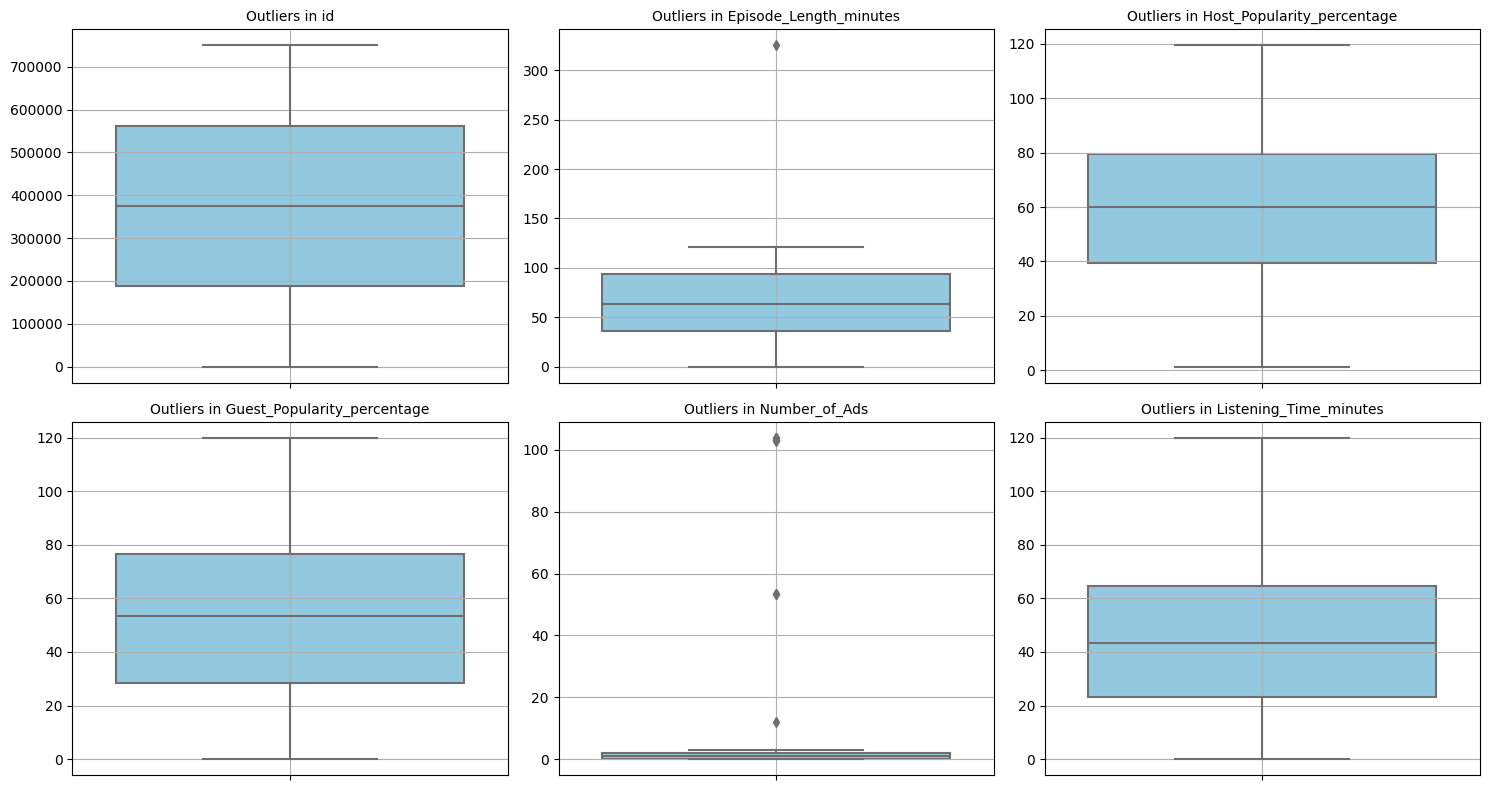

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = train.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outliers in {col}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


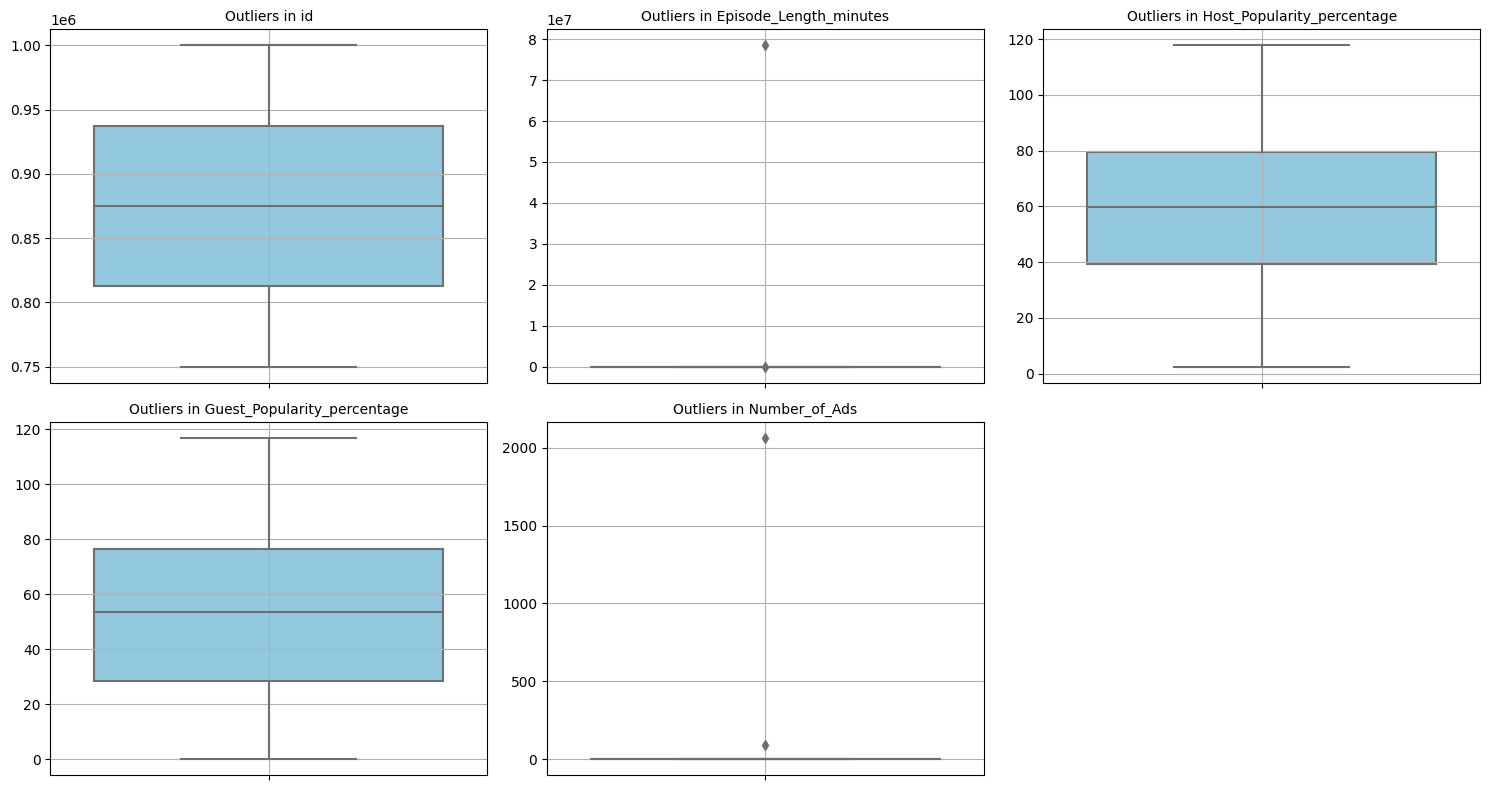

In [4]:
numeric_cols = test.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=test[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outliers in {col}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [5]:
train.max()

id                                  749999
Podcast_Name                   World Watch
Episode_Title                   Episode 99
Episode_Length_minutes              325.24
Genre                           True Crime
Host_Popularity_percentage          119.46
Publication_Day                  Wednesday
Publication_Time                     Night
Guest_Popularity_percentage         119.91
Number_of_Ads                       103.91
Episode_Sentiment                 Positive
Listening_Time_minutes              119.97
dtype: object

In [6]:
test.max()

id                                  999999
Podcast_Name                   World Watch
Episode_Title                   Episode 99
Episode_Length_minutes          78486264.0
Genre                           True Crime
Host_Popularity_percentage          117.76
Publication_Day                  Wednesday
Publication_Time                     Night
Guest_Popularity_percentage         116.82
Number_of_Ads                       2063.0
Episode_Sentiment                 Positive
dtype: object

In [7]:
test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [8]:
numerical_columns=['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads']
categorical_columns = [col for col in test.columns if col not in numerical_columns]
categorical_columns.remove('id')
print(categorical_columns)

['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


In [9]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the acceptable range
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR
        
        # Replace outliers with NaN
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

    return df

# Apply function to remove outliers
train = remove_outliers(train, numerical_columns)
test = remove_outliers(test, numerical_columns)
test.info()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: Ru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221262 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                249998 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


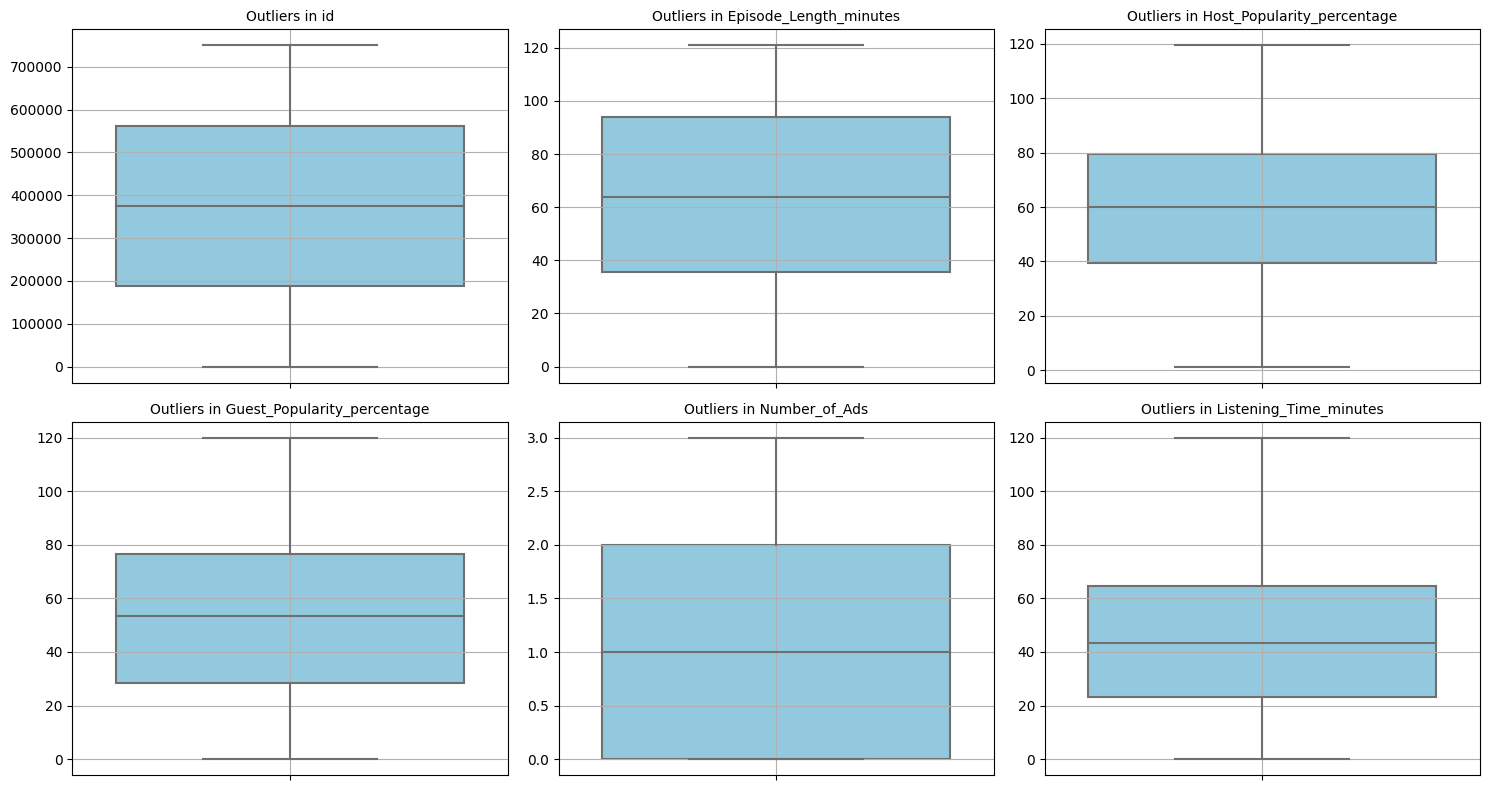

In [10]:
# Select only numeric columns
numeric_cols = train.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=train[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outliers in {col}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


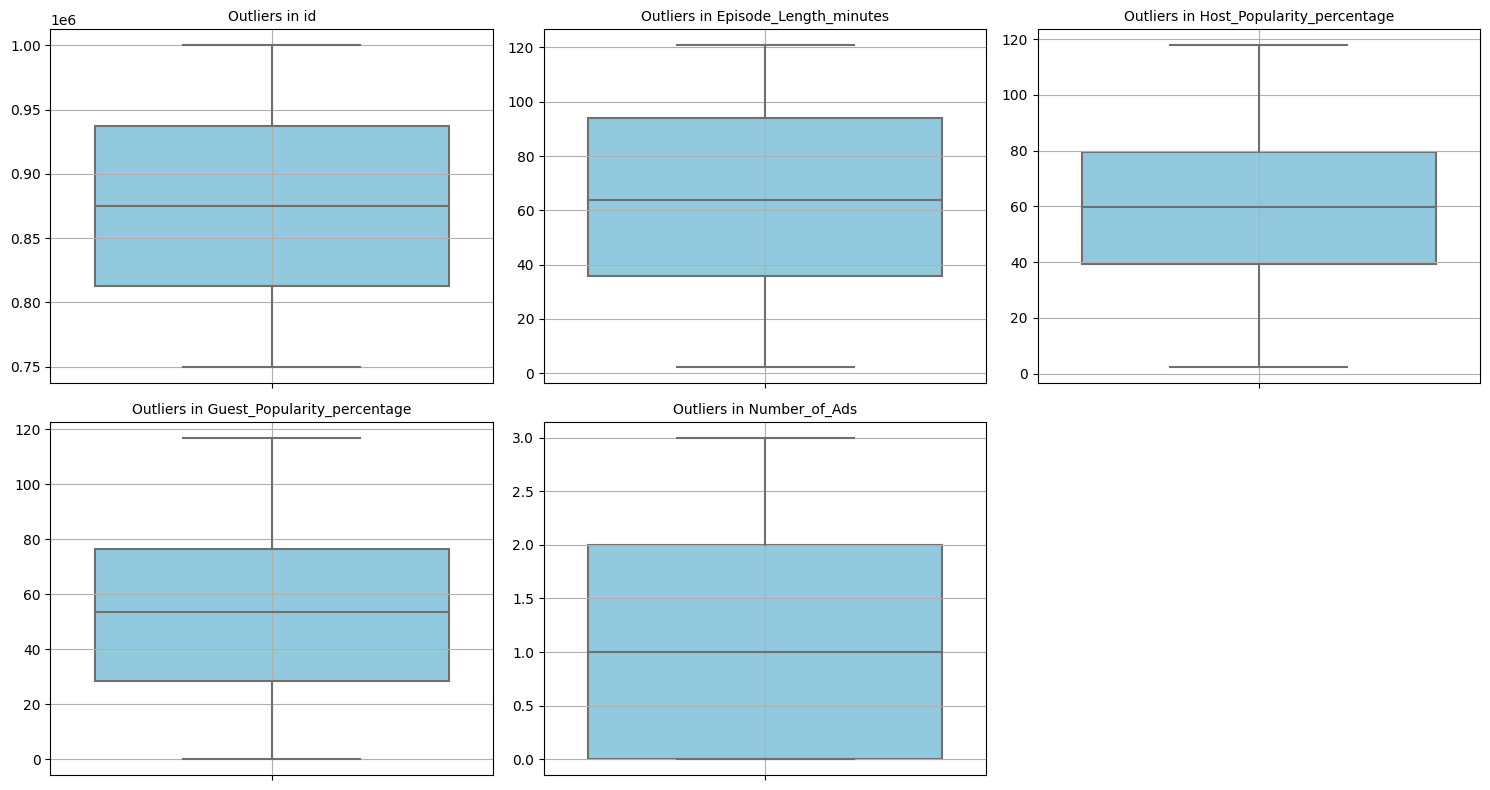

In [11]:
numeric_cols = test.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=test[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Outliers in {col}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].grid(True)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
train.isna().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87094
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                      10
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662906 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749990 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [14]:
numerical_columns=['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage','Number_of_Ads']
categorical_columns = [col for col in test.columns if col not in numerical_columns]
categorical_columns.remove('id')
print(categorical_columns)

['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']


In [15]:
for col in categorical_columns:
    train[col].fillna(train[col].mode()[0], inplace=True)  # Fill with mode
    test[col].fillna(test[col].mode()[0], inplace=True)  # Fill with mode

for col in numerical_columns:
    train[col].fillna(train[col].mean(), inplace=True)  # Fill with mean
    test[col].fillna(test[col].mean(), inplace=True)  # Fill with mean
train.info()

<ipython-input-15-957724fa5e35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)  # Fill with mode
<ipython-input-15-957724fa5e35>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [16]:
train[numerical_columns].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
Episode_Length_minutes,1.000000,0.022185,-0.008249,-0.054871
Host_Popularity_percentage,0.022185,1.000000,0.020111,-0.017849
Guest_Popularity_percentage,-0.008249,0.020111,1.000000,0.007743
Number_of_Ads,-0.054871,-0.017849,0.007743,1.000000


In [17]:
test[numerical_columns].corr()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
Episode_Length_minutes,1.000000,0.020181,-0.009374,-0.051307
Host_Popularity_percentage,0.020181,1.000000,0.019781,-0.017992
Guest_Popularity_percentage,-0.009374,0.019781,1.000000,0.013557
Number_of_Ads,-0.051307,-0.017992,0.013557,1.000000


In [18]:
# Ensure that the columns are in the same order in both train and test datasets
# Sort the columns in both the train and test data by column names (or by column index), which guarantees that they match:
train = train[sorted(train.columns)]  # Sort columns of train data
test = test[sorted(test.columns)]    # Sort columns of test data

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Initialize scalers and encoders
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform on the training data
df_numerical_scaled_train = pd.DataFrame(scaler.fit_transform(train[numerical_columns]), columns=numerical_columns)
df_categorical_encoded_train = pd.DataFrame(encoder.fit_transform(train[categorical_columns]))
df_categorical_encoded_train.columns = encoder.get_feature_names_out(categorical_columns)

# Now, transform the test data using the statistics learned from the training data
df_numerical_scaled_test = pd.DataFrame(scaler.transform(test[numerical_columns]), columns=numerical_columns)
df_categorical_encoded_test = pd.DataFrame(encoder.transform(test[categorical_columns]))
df_categorical_encoded_test.columns = encoder.get_feature_names_out(categorical_columns)

# Combine the scaled and encoded data
train_transformed = pd.concat([df_numerical_scaled_train, df_categorical_encoded_train], axis=1)
test_transformed = pd.concat([df_numerical_scaled_test, df_categorical_encoded_test], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
train_transformed.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.000000,0.653611,0.000000,-1.213262,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.784031,0.309976,0.928792,0.586984,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.303137,0.442009,-1.694624,-1.213262,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.086003,-0.115415,1.036502,0.586984,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.484303,0.883576,0.252376,1.487107,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
test_transformed.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Podcast_Name_Athlete's Arena,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,...,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Negative,Episode_Sentiment_Neutral,Episode_Sentiment_Positive
0,0.466390,-0.950895,0.042831,-0.313139,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.181952,0.499718,-0.001710,-1.213262,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.148272,0.351072,1.773236,-1.213262,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.641749,-1.594009,-0.019053,0.586984,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.252160,-0.076942,-1.603364,0.586984,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
X = train_transformed  # replace with your feature columns
y = train['Listening_Time_minutes']  # replace with your target column

# trying LGB regressor

In [23]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 

# Set up the LightGBM Regressor with a grid search for hyperparameter tuning
param_grid = {
    'max_depth': [-1],  # Maximum depth of the tree
    'n_estimators': [10000, 25000],  # Number of boosting iterations
    'reg_lambda': [1.0],              # L2 regularization
    'min_child_samples': [20],               # Minimum number of samples per leaf
    'subsample': [0.8],                      # Row sampling
    'colsample_bytree': [0.8],                # Feature sampling   
    'device': ['gpu']  # Enable GPU    
}

# LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(boosting_type='gbdt', tree_learner='serial', device='gpu')


# Perform grid search with early stopping
grid_search = GridSearchCV(
    lgb_regressor,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X, y)

# Best hyperparameters from grid search
print("Best Parameters:", grid_search.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 176
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (8.58 MB) transferred to GPU in 0.011976 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 45.437406
Best Parameters: {'colsample_bytree': 0.8, 'device': 'gpu', 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 10000, 'reg_lambda': 1.0, 'subsample': 0.8}


In [24]:
# Get cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Convert negative RMSE back to positive
cv_results['mean_RMSE'] = -cv_results['mean_test_score']

# Show top few rows
print(cv_results[['params', 'mean_RMSE']].sort_values(by='mean_RMSE'))
best_rmse = -grid_search.best_score_
print("Best CV RMSE:", round(best_rmse, 4))

                                              params  mean_RMSE
0  {'colsample_bytree': 0.8, 'device': 'gpu', 'ma...  12.848066
1  {'colsample_bytree': 0.8, 'device': 'gpu', 'ma...  12.907986
Best CV RMSE: 12.8481


In [25]:
# Predict on the test set
y_pred = grid_search.best_estimator_.predict(test_transformed)

In [26]:
# Submission file
submission = pd.DataFrame({'id': test['id'], 'Listening_Time_minutes': y_pred})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully!")

✅ Submission file created successfully!


In [27]:
submission.head()

,id,Listening_Time_minutes
0,750000,51.776027
1,750001,18.058016
2,750002,46.341799
3,750003,76.817899
4,750004,46.098950


# trying SVR with log(y)

In [28]:
'''
from sklearn.svm import SVR

y_log = np.log1p(y)  # log(y + 1) to avoid issues with log(0)

# Set up the SVR model with a grid search for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
}

svr = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y_log)

# Best hyperparameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Get cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Convert negative RMSE back to positive
cv_results['mean_RMSE'] = -cv_results['mean_test_score']
print(cv_results[['params', 'mean_RMSE']].sort_values(by='mean_RMSE'))
best_rmse = -grid_search.best_score_
print("Best CV RMSE:", round(best_rmse, 4))
'''

'\nfrom sklearn.svm import SVR\n\ny_log = np.log1p(y)  # log(y + 1) to avoid issues with log(0)\n\n# Set up the SVR model with a grid search for hyperparameter tuning\nparam_grid = {\n    \'C\': [0.1, 1, 10],  # Regularization parameter\n}\n\nsvr = SVR()\n\n# Perform grid search with cross-validation\ngrid_search = GridSearchCV(svr, param_grid, cv=5, scoring=\'neg_root_mean_squared_error\', n_jobs=-1)\ngrid_search.fit(X, y_log)\n\n# Best hyperparameters from grid search\nprint("Best Parameters:", grid_search.best_params_)\n\n# Get cross-validation results\ncv_results = pd.DataFrame(grid_search.cv_results_)\n\n# Convert negative RMSE back to positive\ncv_results[\'mean_RMSE\'] = -cv_results[\'mean_test_score\']\nprint(cv_results[[\'params\', \'mean_RMSE\']].sort_values(by=\'mean_RMSE\'))\nbest_rmse = -grid_search.best_score_\nprint("Best CV RMSE:", round(best_rmse, 4))\n'

In [29]:
'''
# Predict on the test set
y_pred_log = grid_search.best_estimator_.predict(test_transformed)

# Inverse transform log(y) to get original scale predictions
y_pred = np.expm1(y_pred_log)  # exp(y_pred_log) - 1 to get original scale
'''

'\n# Predict on the test set\ny_pred_log = grid_search.best_estimator_.predict(test_transformed)\n\n# Inverse transform log(y) to get original scale predictions\ny_pred = np.expm1(y_pred_log)  # exp(y_pred_log) - 1 to get original scale\n'

# tried DNN but it gives a little higher RMSE compared to LGB regressor:

In [30]:
'''
!pip install keras-tuner
'''

'\n!pip install keras-tuner\n'

In [31]:
'''
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
# Assuming you have a DataFrame `df` with features in `X` and target in `y`

def build_model(hp):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=256, max_value=1024, step=256),
        activation='relu',
        input_dim=X_train.shape[1],
        kernel_regularizer=l2(hp.Float('l2_1', 1e-3, 1e-2, sampling='LOG'))
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.3, step=0.1)))
    
    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=256, max_value=512, step=128),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_2', 1e-3, 1e-2, sampling='LOG'))
    ))
    
    # Output layer
    model.add(Dense(1))

    # Optimizer with tunable learning rate
    optimizer = Adam(
        learning_rate=hp.Float('learning_rate', 1e-3, 1e-3, sampling='LOG')
    )
    
    model.compile(optimizer=optimizer, loss='mse')
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='regression_dnn'
)
'''

"\nfrom kerastuner.tuners import RandomSearch\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense, Dropout\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.callbacks import EarlyStopping\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.optimizers import Adam\n# Assuming you have a DataFrame `df` with features in `X` and target in `y`\n\ndef build_model(hp):\n    model = Sequential()\n    \n    # First hidden layer\n    model.add(Dense(\n        units=hp.Int('units_1', min_value=256, max_value=1024, step=256),\n        activation='relu',\n        input_dim=X_train.shape[1],\n        kernel_regularizer=l2(hp.Float('l2_1', 1e-3, 1e-2, sampling='LOG'))\n    ))\n    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.3, step=0.1)))\n    \n    # Second hidden layer\n    model.add(Dense(\n        units=hp.Int('units_2', min_value=256, max_value=512, step=128),\n        activation

In [32]:
'''
from sklearn.model_selection import train_test_split

X = train_transformed  # replace with your feature columns
y = train['Listening_Time_minutes']  # replace with your target column

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train,
    epochs=25,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)
'''

"\nfrom sklearn.model_selection import train_test_split\n\nX = train_transformed  # replace with your feature columns\ny = train['Listening_Time_minutes']  # replace with your target column\n\n# Split the dataset into training and validation sets\nX_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)\n\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)\n\ntuner.search(\n    X_train, y_train,\n    epochs=25,\n    validation_data=(X_val, y_val),\n    callbacks=[early_stopping]\n)\n"

In [33]:
'''
model = tuner.get_best_models(1)[0]
'''

'\nmodel = tuner.get_best_models(1)[0]\n'

In [34]:
'''
predictions = model.predict(test_transformed)
'''

'\npredictions = model.predict(test_transformed)\n'

In [35]:
'''
# Submission file
submission = pd.DataFrame({'id': test['id'], 'Listening_Time_minutes': predictions.flatten()})
submission.to_csv('submission.csv', index=False)

print("✅ Submission file created successfully!")
'''

'\n# Submission file\nsubmission = pd.DataFrame({\'id\': test[\'id\'], \'Listening_Time_minutes\': predictions.flatten()})\nsubmission.to_csv(\'submission.csv\', index=False)\n\nprint("✅ Submission file created successfully!")\n'

In [36]:
'''
history = model.fit(
    X_train, y_train, 
    epochs=5, 
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],  # Using early stopping
    verbose=1
)

# Plot training and validation loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss vs Epochs')
plt.show()
'''

"\nhistory = model.fit(\n    X_train, y_train, \n    epochs=5, \n    validation_data=(X_val, y_val),\n    callbacks=[early_stopping],  # Using early stopping\n    verbose=1\n)\n\n# Plot training and validation loss vs epochs\nplt.plot(history.history['loss'], label='Training Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.title('Training and Validation Loss vs Epochs')\nplt.show()\n"